In [123]:
import random

# Milan Kovacs - 21308128, Caoimhe Cahill - 21331308
# The code runs to execution

"""
Work to be done:
    - Loading of data    # Caoimhe
    - Processing of data # Caoimhe
    - Define optimiser   # Milan 1 done
    - Define loss function # Caoimhe
    - Define activation function (sigmoid vs others) # Milan done
    - Train
        - Save # Milan
        - Load # Milan
    - Add comments explaining code
    - Playing with Hyperparameters and noting the results
        - Matplotlib 
            - Training graph
            - Accuracy
    - Evaluation 
"""

'\nWork to be done:\n    - Loading of data    # Caoimhe\n    - Processing of data # Caoimhe\n    - Define optimiser   # Milan 1 done\n    - Define loss function # Caoimhe\n    - Define activation function (sigmoid vs others) # Milan done\n    - Train\n        - Save # Milan\n        - Load # Milan\n    - Add comments explaining code\n    - Playing with Hyperparameters and noting the results\n        - Matplotlib \n            - Training graph\n            - Accuracy\n    - Evaluation \n'

In [48]:
# Imports
from typing import Callable, List
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

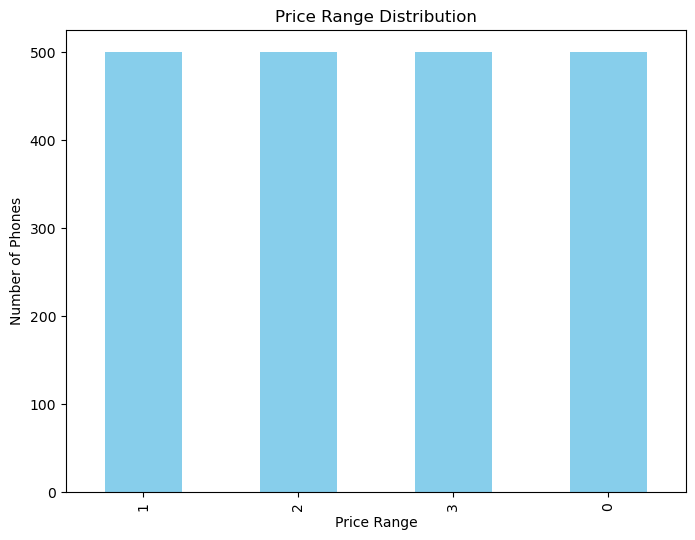

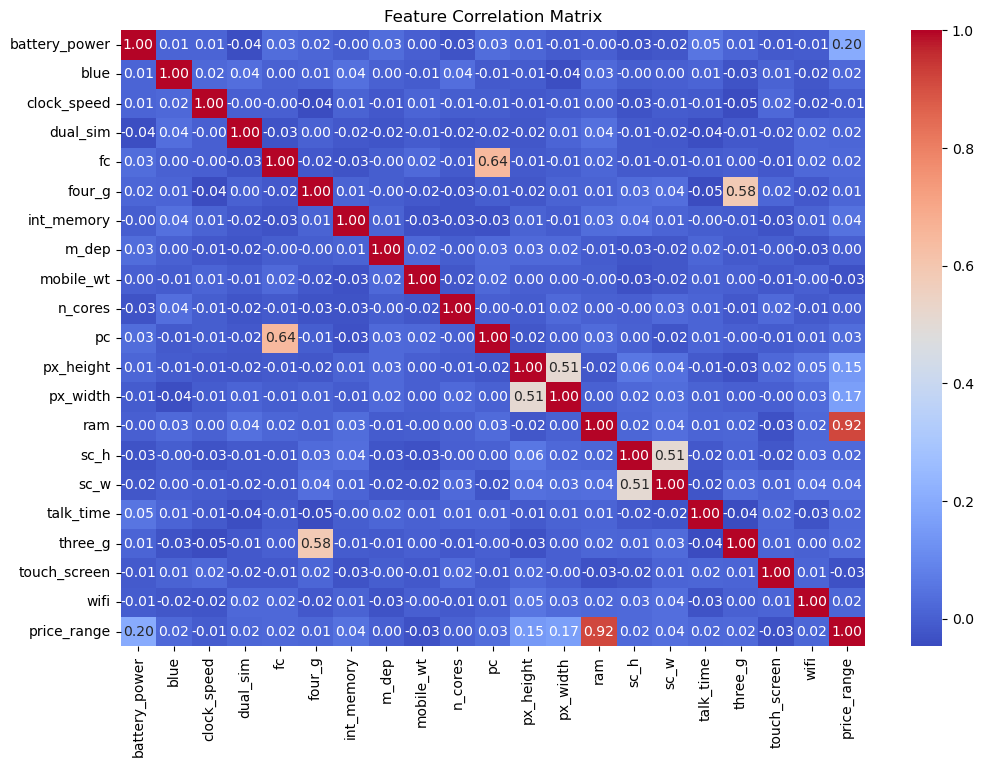

x_train shape: (1600, 6)
x_test shape: (400, 6)
y_train shape: (1600,)
y_test shape: (400,)


In [50]:
# Loading data from csv and printing it
dataset_path = 'phones.csv'
data = pd.read_csv(dataset_path)
print(data)

#Bar Chart graph shows there's no imbalance with the predication value in the dataset - no bias
# Count occurrences of each price range
price_range_counts = data['price_range'].value_counts()
plt.figure(figsize=(8, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.show()

# Analyze feature correlations
"""
There is of features so we will use this correlation to decide what features to use 
- selecting features that correlate well with your target variable
- reduce noise
"""
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

#Seperate features and target(prediction variable)
X = data[['battery_power', 'ram', 'int_memory', 'px_width', 'px_height', 'sc_w']]#Features
Y = data['price_range'] #Target(prediction variable)

#Split data in training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a MinMaxScaler for normalisation
scaler = MinMaxScaler()

# Fit Scaler on sets
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Print shapes and the first few rows of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


In [125]:
# Constructor
class MultiLayerPerceptron:
    def __init__(self, 
                 layers: List[int], 
                 provided_loss_function: Callable[[float, float], float] = print, # todo: decide whether we pass these functions or call a switch case
                 provided_optimiser: Callable[['MultiLayerPerceptron'], float] = print,
                 provided_activation_function: Callable[[float], float] = print,
                 provided_activation_function_prime: Callable[[float], float] = print,
                 training_data: List[any] = None,
                 test_data: List[any] = None,                  
                 learning_rate: float = 0.2, 
                 epoch: int = 1_000,
                 mini_batch_size: int = 100,
                 k_fold: int = 6, 
                 split_data: bool = False) -> None:
        # Declarations
        if test_data is None:
            test_data = []
            
        if training_data is None:
            training_data = []
        
        self.layers  = layers
        self.num_layers = len(self.layers)
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.training_data = training_data
        self.test_data  = test_data
        self.k_fold = k_fold
        self.config_data = split_data
        self.loss_function = provided_loss_function
        self.activation_function = provided_activation_function
        self.activation_function_prime = provided_activation_function_prime
        self.mini_batch_size = mini_batch_size
        self.optimiser = provided_optimiser
        self.weights = []
        self.biases  = []
        print(str(self))
        # Setting up
        self.set_weights()
        self.set_biases()
        self.optimiser(self)


        # Transform data
        
        # Completion
 
    
    """
        * Generates a list of array shapes for each weight that corresponds to each weight in a given layer.
        * for example: if our layer is [4, 5, 2, 1], then we will have two lists to zip through
        * [4, 5, 2] and [5, 2, 1] which means on first iteration, we have our input layer of [4] nodes connecting to each [5] nodes 
        * in the first hidden layer. This will generate a shape of 5 lists, with 4 weights each.
        * Each shape corresponds to a node within our hidden layer (of 5 nodes) and in each shape the index 
        * corresponds to the index of our input layer. This is applied for the rest of the layers. 
    """
    def set_weights(self) -> None:
        layers_after_input_layer = self.layers[1:]
        layers_before_output_layer = self.layers[:-1]
        self.weights = [
            np.random.randn(y, x)
            for x, y in zip(layers_before_output_layer, layers_after_input_layer)
        ]
    
    """
        * Generates a list of Y by 1 dimensional list, where Y is the given layer size.
        * This means we can correspond each index to a layer of biases,
        * and within it, we can correspond each bias to a given node inside of that layer
    """
    def set_biases(self) -> None:
        layers_after_input = self.layers[1:]
        self.biases = [
            np.random.randn(y, 1) 
            for y in layers_after_input
        ]
    
    def update_mini_batch(self, mini_batch: List[tuple[any, any]]) -> None:
        lr = self.learning_rate
        nabla_biases = [np.zeros(b.shape) for b in self.biases]   # Derivative of biases
        nabla_weights = [np.zeros(w.shape) for w in self.weights] # Derivative of weights
        
        """
            * We will iterate through the inputs and expected outputs of our mini batch provided
            * 
        """
        for _input, expected_output in mini_batch:
            delta_nabla_biases, delta_nabla_weights = self.backprop(_input, expected_output)
            nabla_biases = [nabla_bias + delta_nabla_bias for nabla_bias, delta_nabla_bias in zip(nabla_biases, delta_nabla_biases)]
            nabla_weights = [nabla_weight + delta_nabla_weight for nabla_weight, delta_nabla_weight in zip(nabla_weights, delta_nabla_weights)]
            
        """
           * [weight - (lr / len(mini_batch)) * nabla_weight
                        for weight, nabla_weight in zip(self.weights, nabla_weights)]
           * This is the delta rule applied to all the weights and biases. 
           *                new_weight = weight - derivative_weight * learning_rate
           *
           * We have our weights and the delta_weights (nabla_weights) and we iterate through the two in parallel
           * We divide the learning_rate by the number of items in our mini_batch to keep it proportional
           * 
           * This same concept is applied to the biases
        """
        self.weights = [weight - (lr / len(mini_batch)) * nabla_weight
                        for weight, nabla_weight in zip(self.weights, nabla_weights)]
        self.biases = [bias - (lr / len(mini_batch)) * nabla_bias
                       for bias, nabla_bias in zip(self.biases, nabla_biases)]
    
    """
        * 
    """
    def backprop(self, _in, _expected) -> (List, List):
        nabla_biases =  [np.zeros(b.shape) for b in self.biases]   # Derivative of biases
        nabla_weights = [np.zeros(w.shape) for w in self.weights] # Derivative of weights
        
        activation  = _in    # The inputted activation
        activations = [_in]  # We will store all the activations, so we know which nodes are triggered
        outputs     = []   
        
        
        for bias, weight in zip(self.biases, self.weights):
            output = np.dot(weight, activation) + bias # What is calculated by the node
            outputs.append(output)         # Store all the outputs for the layer
            activation = self.activation_function(output)   # Activation for current node
            activations.append(activation) # Activations for the layer provided
            
        # Backward pass
        delta = self.loss_function(activations[-1], _expected) * self.activation_function_prime(outputs[-1])
        nabla_biases[-1] = delta
        nabla_weights[-1] = np.dot(delta, activations[-2].transpose())
        
        for layer in range(2, self.num_layers):
            output = outputs[-layer]
            _optimiser_prime = self.activation_function_prime(output)
            delta = np.dot(self.weights[-layer+1].transpose(), delta) * _optimiser_prime
            nabla_biases[-layer] = delta
            nabla_weights[-layer] = np.dot(delta, activations[-layer-1].transpose())
        
        return nabla_biases, nabla_weights
    
    def evaluate(self, data):
        test_results = [
            (np.argmax(self.feedforward(_in)), expected)
            for (_in, expected) in data
        ]
        return sum(int(_in == expected) for (_in, expected) in test_results)

    def feedforward(self, _in):
        for bias, weight in zip(self.biases, self.weights):
            _in = self.activation_function(np.dot(weight, _in) + bias)
        return _in
    
    def __str__(self) -> str:
        string = "Network generated with the following layers: " + str(self.layers) +       "\n" + \
        "num_layers = "+     str(self.num_layers) +                                         "\n" + \
        "learning_rate = "+    str(self.learning_rate) +                                    "\n" + \
        "epoch = "+            str(self.epoch) +                                            "\n" + \
        "training_data = "+    str(len(self.training_data)) +                               "\n" + \
        "test_data = "+        str(len(self.test_data)) +                                   "\n" + \
        "k_fold = "+           str(self.k_fold) +                                           "\n" + \
        "config_data = "+      str(self.config_data) +                                      "\n" + \
        "loss_function = "+    str(self.loss_function.__name__) +                           "\n" + \
        "activation_function = "+ str(self.activation_function.__name__) +                  "\n" + \
        "activation_function_prime = "+ str(self.activation_function_prime.__name__) +      "\n" + \
        "mini_batch_size = "+ str(self.mini_batch_size) +                                   "\n" + \
        "optimiser = "+ str(self.optimiser.__name__)
        return string


In [126]:
# Optimisers
"""
    * Rewritten from - http://neuralnetworksanddeeplearning.com/chap1.html 
    * by Michael Nielsen 2019
    
    * It takes in an instance of our MLP
    * The function extracts the properties from our MLP such as
    * test_data, epochs, mini_batch_sizes, training_data
"""
def stochastic_gradient_descent(_mlp: 'MultiLayerPerceptron'):
    _test_data: list = _mlp.test_data
    epochs: int = _mlp.epoch
    _mini_batch_size: int = _mlp.mini_batch_size
    _training_data: list = _mlp.training_data
    
    if _test_data is not None:
        n_test = len(_test_data) # If test_date is provided, then we will grab the number of iterations run for tests
        
    
    for epoch in range(epochs):
        random.shuffle(_training_data)
        
        mini_batches = populate_mini_batch(_training_data, _mini_batch_size)
        
        for mini_batch in mini_batches:
            _mlp.update_mini_batch(mini_batch)
        
        if _test_data is not None:
            correctly_predicted_training_data = _mlp.evaluate(_test_data)
            print(f"Epoch {epoch}: {correctly_predicted_training_data} / {n_test}")
        else:
            print(f"Epoch {epoch} complete")

def Adam(mlp: 'MultiLayerPerceptron'):
    pass

def cross_entropy(mlp: 'MultiLayerPerceptron'):
    pass

# Helper
"""
    * The function takes in training_data which is a list of the training data, and the batch sizes is the size of chunks 
    * we want to split our data set into. The `for iteration in range(0, n_training_data, batch_size)` iterates from 0 to 
    * the number of elements in the training data. Each iteration increments by the batch size number. Then on each 
    * iteration we get a range of elements from the current iteration -> iteration + batch size. This creates evenly
    * distributed chunks.
"""
def populate_mini_batch(_training_data, batch_size) -> list:
    n_training_data = len(_training_data)

    return [
            _training_data[iteration:iteration + batch_size]
            for iteration in range(0, n_training_data, batch_size)
        ]

In [127]:
# Activation functions

# http://neuralnetworksanddeeplearning.com/chap1.html 
# ~ Michael Nielsen 2019
threshold = 0

def sigmoid(y: float):
    return 1.0 / (1.0 + np.exp(-y))

def sigmoid_prime(y: float):
    return sigmoid(y) * (1 - sigmoid(y))
    
def stepper(y: float):
    return 1 if y >= threshold else 0

def stepper_prime(y: float):
    return 0

def tanh(y: float):
    return np.tanh(y)

def tanh_prime(y: float):
    pass

def rectified_linear_unit(y: float):
    pass

def rectified_linear_unit_prime(y: float):
    pass

In [128]:
# Loss Functions
def mean(output_activations: float, actual: float) -> float:
    """Return the vector of partial derivatives partial C_x partial a for the output activations."""
    return output_activations-actual

def mean_squared_error(output_activations, actual):
    return np.square(output_activations - actual)

In [129]:
# K-Fold for training and testing data
import mnist_loader
learning_rate = 3.0
epoch = 30     
mini_batch_size = 10

training_data, validation_data, test_data1 = mnist_loader.load_data_wrapper()
mlp = MultiLayerPerceptron(
    layers = [784, 30, 10], 
    provided_loss_function = mean,
    provided_optimiser = stochastic_gradient_descent,
    provided_activation_function = sigmoid, 
    provided_activation_function_prime = sigmoid_prime,
    training_data = training_data,
    test_data = test_data1,
    learning_rate = learning_rate,
    epoch = epoch
)



Network generated with the following layers: [784, 30, 10]
num_layers = 3
learning_rate = 3.0
epoch = 30
training_data = 50000
test_data = 10000
k_fold = 6
config_data = False
loss_function = mean
activation_function = sigmoid
activation_function_prime = sigmoid_prime
mini_batch_size = 100
optimiser = stochastic_gradient_descent
Epoch 0: 7220 / 10000
Epoch 1: 8377 / 10000
Epoch 2: 8668 / 10000
Epoch 3: 8857 / 10000
Epoch 4: 8941 / 10000
Epoch 5: 8996 / 10000


KeyboardInterrupt: 